In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

import warnings;
warnings.filterwarnings('ignore')

### Euroleague 2020-2021 Season's Stats

In [2]:
df = pd.read_excel("Euroleague 2020-2021.xlsx")
df

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,...,Blocks(Fv),Blocks(Fv)_avg,Blocks(Ag),Blocks(Ag)_avg,Fouls(Cm),Fouls(Cm)_avg,Fouls(Rv),Fouls(Rv)_avg,PIR,PIR_avg
0,"Abalde, Alberto",Real Madrid,6,Forward,Spain,25,202,39,761,281,...,0,0.00,6,0.15,60,1.54,57,1.46,325,8.33
1,"Abrines, Alex",FC Barcelona,21,Forward,Spain,27,198,39,730,237,...,8,0.21,7,0.18,96,2.46,39,1.00,182,4.67
2,"Alocen, Carlos",Real Madrid,12,Guard,Spain,20,194,28,376,110,...,2,0.07,4,0.14,46,1.64,31,1.11,93,3.32
3,"Amaize, Robin",FC Bayern Munich,15,Forward,Germany,26,188,9,51,4,...,0,0.00,1,0.11,6,0.67,2,0.22,-1,-0.11
4,"Anderson, James",Anadolu Efes,23,Forward,USA,31,198,41,622,172,...,6,0.15,3,0.07,55,1.34,39,0.95,234,5.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,3,Guard,Russian Federation,27,192,17,82,15,...,1,0.06,0,0.00,20,1.18,12,0.71,6,0.35
290,"Zipser, Paul",FC Bayern Munich,16,Forward,Germany,26,203,39,858,356,...,10,0.26,5,0.13,86,2.21,74,1.90,371,9.51
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,23,Center,Croatia,23,210,34,676,309,...,26,0.76,17,0.50,56,1.65,58,1.71,386,11.35
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,50,Guard,Poland,22,200,11,150,29,...,0,0.00,1,0.09,22,2.00,7,0.64,18,1.64


In [3]:
df = df[['Player','Club','Position','Nation','Age','Height','Games','Min','Pts',
         'Rebounds(T)', 'Steals', 'Blocks(Fv)']]

In [4]:
df

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,Rebounds(T),Steals,Blocks(Fv)
0,"Abalde, Alberto",Real Madrid,Forward,Spain,25,202,39,761,281,104,21,0
1,"Abrines, Alex",FC Barcelona,Forward,Spain,27,198,39,730,237,72,22,8
2,"Alocen, Carlos",Real Madrid,Guard,Spain,20,194,28,376,110,38,6,2
3,"Amaize, Robin",FC Bayern Munich,Forward,Germany,26,188,9,51,4,4,2,0
4,"Anderson, James",Anadolu Efes,Forward,USA,31,198,41,622,172,113,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,7,5,1
290,"Zipser, Paul",FC Bayern Munich,Forward,Germany,26,203,39,858,356,116,26,10
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,Center,Croatia,23,210,34,676,309,182,14,26
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,Guard,Poland,22,200,11,150,29,17,6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player       294 non-null    object
 1   Club         294 non-null    object
 2   Position     294 non-null    object
 3   Nation       294 non-null    object
 4   Age          294 non-null    int64 
 5   Height       294 non-null    int64 
 6   Games        294 non-null    int64 
 7   Min          294 non-null    int64 
 8   Pts          294 non-null    int64 
 9   Rebounds(T)  294 non-null    int64 
 10  Steals       294 non-null    int64 
 11  Blocks(Fv)   294 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 27.7+ KB


In [6]:
df.describe()

,Age,Height,Games,Min,Pts,Rebounds(T),Steals,Blocks(Fv)
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,27.578231,199.710884,24.057823,450.500000,177.105442,65.227891,15.006803,5.404762
std,4.565676,8.186067,11.480807,305.773386,147.231397,54.368033,12.529554,8.139742
min,17.000000,178.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,193.000000,15.000000,168.500000,42.250000,19.250000,5.000000,0.000000
50%,28.000000,200.000000,28.000000,471.000000,151.500000,52.000000,13.000000,2.000000
75%,31.000000,205.000000,33.000000,700.750000,281.000000,101.750000,23.000000,7.000000
max,40.000000,223.000000,41.000000,1200.000000,668.000000,289.000000,59.000000,63.000000


In [7]:
# scipy

stats.describe(df.Height)

DescribeResult(nobs=294, minmax=(178, 223), mean=199.7108843537415, variance=67.01169000023216, skewness=0.05045624442792811, kurtosis=-0.14685846239443956)

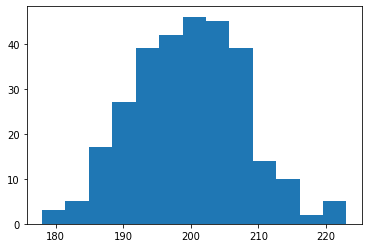

In [8]:
plt.hist(df.Height, bins='auto');

<div class="alert alert-block alert-danger">
    
<b>Count - Sum - Max - Min</b>
    
</div>

In [9]:
df.Height.agg(['count', max, min, np.sum])

count      294
max        223
min        178
sum      58715
Name: Height, dtype: int64

In [10]:
df[['Height']].describe().T

,count,mean,std,min,25%,50%,75%,max
Height,294.0,199.710884,8.186067,178.0,193.0,200.0,205.0,223.0


***

<div class="alert alert-block alert-danger">
    
<b>Mean</b>
    
</div>

In [11]:
# NumPy

np.mean(df.Height)

199.7108843537415

In [12]:
np.mean(df)

Age             27.578231
Height         199.710884
Games           24.057823
Min            450.500000
Pts            177.105442
Rebounds(T)     65.227891
Steals          15.006803
Blocks(Fv)       5.404762
dtype: float64

In [13]:
# Pandas

df.mean()

Age             27.578231
Height         199.710884
Games           24.057823
Min            450.500000
Pts            177.105442
Rebounds(T)     65.227891
Steals          15.006803
Blocks(Fv)       5.404762
dtype: float64

In [14]:
# Pandas

df.Height.mean()

199.7108843537415

***

<div class="alert alert-block alert-danger">
    
<b>Mode</b>
    
</div>

In [15]:
# Pandas

df.Height.mode()

0    198
1    203
dtype: int64

In [16]:
df.Height.mode()[0]

198

In [17]:
df.Nation.mode()

0    USA
dtype: object

In [18]:
# Scipy

stats.mode(df.Height)

ModeResult(mode=array([198], dtype=int64), count=array([21]))

In [19]:
stats.mode(df.Nation)

ModeResult(mode=array(['USA'], dtype=object), count=array([81]))

***

<div class="alert alert-block alert-danger">
    
<b>Median</b>
    
</div>

In [20]:
# Numpy

np.median(df.Height)

200.0

In [21]:
# Pandas

df.median()

Age             28.0
Height         200.0
Games           28.0
Min            471.0
Pts            151.5
Rebounds(T)     52.0
Steals          13.0
Blocks(Fv)       2.0
dtype: float64

In [22]:
df['Height'].median()

200.0

In [23]:
df.iloc[[0]].median(axis=1, skipna=True)  # If we set skipna=True, it ignores the NaN in the dataframe.

0    71.5
dtype: float64

In [24]:
# with pandas quantile

df.Height.quantile(.5)

200.0

In [25]:
# with numpy percentile

np.percentile(df.Height, 50)

200.0

In [26]:
np.percentile(df.Height, 50) == np.median(df.Height)

True

***

<div class="alert alert-block alert-danger">
    
<b>Range</b>
    
</div>

In [27]:
# with Pandas

df.Height.max() - df.Height.min()

45

In [28]:
# with NumPy

np.max(df.Height) - np.min(df.Height)

45

***

<div class="alert alert-block alert-danger">
    
<b>Variance and Standard Deviation</b>
    
</div>

In [29]:
np.var(df.Height)  # population variance

66.78375908186403

In [30]:
np.std(df.Height)  # population standard deviation

8.172133080283508

In [31]:
np.sqrt(np.var(df.Height))

8.172133080283508

In [32]:
np.var(df.Height, ddof=1)  # sample variance

67.01169000023216

In [33]:
np.std(df.Height, ddof=1)  # sample standard deviation

8.186066821143848

In [34]:
# with pandas
# default value is sample standard deviation and sample variance

df.Height.std()

8.186066821143848

In [35]:
df.Height.agg(np.std)

8.186066821143848

In [36]:
df.Height.var()

67.01169000023216

***

<div class="alert alert-block alert-danger">
    
<b>Standard Error (SE)</b>
    
</div>

In [37]:
df.Height.count()

294

In [38]:
df.Height.std()

8.186066821143848

In [39]:
se = df.Height.std() / df.Height.count()**0.5

In [40]:
se

0.47742111219356076

In [41]:
# with pandas function

df.Height.sem()

0.47742111219356076

In [42]:
df.Height.sem(ddof=1)  # delta degrees of freedom

0.47742111219356076

<div class="alert alert-block alert-danger">
    
<b>Inter Quartile Range (IQR)</b>
    
</div>

In [ ]:
# WITH NUMPY

In [43]:
np.percentile(df.Height, 25)

193.0

In [44]:
np.percentile(df.Height, 75)

205.0

In [45]:
np.percentile(df.Height, [25, 75])

array([193., 205.])

In [46]:
IQR = np.percentile(df.Height, 75)-np.percentile(df.Height, 25)
IQR

12.0

In [47]:
# WITH SCIPY

stats.iqr(df.Height)

12.0

In [ ]:
# WITH PANDAS

In [48]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

In [49]:
IQR

12.0

In [50]:
df.Height.quantile([.1, .25, .5, .75, 1])

0.10    190.0
0.25    193.0
0.50    200.0
0.75    205.0
1.00    223.0
Name: Height, dtype: float64

***

<div class="alert alert-block alert-danger">
    
<b>Skewness and Kurtosis</b>
    
</div>

#### SHAPE OF A DISTRIBUTION

In [51]:
skewness = stats.skew(df.Height)      # "stats.skew(samples, bias=False)" for sample
kurtosis = stats.kurtosis(df.Height)  # "stats.kurtosis(samples, bias=False)" for sample

In [52]:
skewness

0.05045624442792811

In [53]:
stats.skew(df.Height, bias=False)

0.050715363871748145

In [54]:
kurtosis

-0.14685846239443956

In [55]:
stats.kurtosis(df.Height, bias=False)

-0.12869782042394418

In [ ]:
# with pandas

In [56]:
df.Height.skew() # default value is for samples

0.050715363871748166

In [57]:
df.Height.kurtosis()
# df.Height.kurt()

-0.12869782042394373

In [58]:
df.groupby('Position').skew(numeric_only=True)

,Age,Height,Games,Min,Pts,Rebounds(T),Steals,Blocks(Fv)
Position,,,,,,,,
Center,-0.117843,0.540566,-0.350123,0.258308,0.595392,0.480182,1.026888,1.792508
Forward,-0.011640,-0.770066,-0.633730,-0.133303,0.465465,0.374201,0.454310,1.141684
Guard,-0.195171,-0.530791,-0.550831,0.265926,0.781297,0.592102,0.812287,2.188251


***

<div class="alert alert-block alert-danger">
    
<b>Covariance</b>
    
</div>

In [59]:
df.columns

Index(['Player', 'Club', 'Position', 'Nation', 'Age', 'Height', 'Games', 'Min',
       'Pts', 'Rebounds(T)', 'Steals', 'Blocks(Fv)'],
      dtype='object')

In [60]:
np.cov(df.Height, df.Steals)

array([[ 67.01169   , -13.76253163],
       [-13.76253163, 156.98971466]])

In [61]:
np.cov(df.Height, df.Steals, bias=True)  # for sample

array([[ 66.78375908, -13.7157203 ],
       [-13.7157203 , 156.45573604]])

In [62]:
# with scipy

stats.tvar(df.Height)

67.01169000023216

In [63]:
stats.tvar(df.Steals)

156.98971465719396

***

<div class="alert alert-block alert-danger">
    
<b>Correlation</b>
    
</div>

### Numpy

In [64]:
np.corrcoef(df.Height, df.Steals)

array([[ 1.        , -0.13417989],
       [-0.13417989,  1.        ]])

### Pandas

In [65]:
df.corr()

,Age,Height,Games,Min,Pts,Rebounds(T),Steals,Blocks(Fv)
Age,1.000000,-0.065369,0.329799,0.317331,0.251841,0.206932,0.255639,0.049518
Height,-0.065369,1.000000,-0.003925,-0.039851,-0.052875,0.362994,-0.134180,0.465772
Games,0.329799,-0.003925,1.000000,0.877602,0.748415,0.726125,0.734245,0.382385
Min,0.317331,-0.039851,0.877602,1.000000,0.925177,0.796655,0.873610,0.398799
Pts,0.251841,-0.052875,0.748415,0.925177,1.000000,0.729195,0.821172,0.370077
Rebounds(T),0.206932,0.362994,0.726125,0.796655,0.729195,1.000000,0.660039,0.690989
Steals,0.255639,-0.134180,0.734245,0.873610,0.821172,0.660039,1.000000,0.322773
Blocks(Fv),0.049518,0.465772,0.382385,0.398799,0.370077,0.690989,0.322773,1.000000


In [66]:
df.Height.corr(df.Steals)

-0.1341798941077568

In [67]:
df.corr().loc['Height', 'Steals']

-0.13417989410775719

In [ ]:
# spearman

In [68]:
df.corr("spearman")
# df.corr(method="spearman")

,Age,Height,Games,Min,Pts,Rebounds(T),Steals,Blocks(Fv)
Age,1.000000,-0.077992,0.294219,0.320439,0.297643,0.256063,0.303392,0.166543
Height,-0.077992,1.000000,0.003762,-0.035377,-0.026214,0.319475,-0.116501,0.519252
Games,0.294219,0.003762,1.000000,0.884516,0.812355,0.811797,0.803117,0.510379
Min,0.320439,-0.035377,0.884516,1.000000,0.955337,0.875682,0.918351,0.531931
Pts,0.297643,-0.026214,0.812355,0.955337,1.000000,0.847482,0.875183,0.518173
Rebounds(T),0.256063,0.319475,0.811797,0.875682,0.847482,1.000000,0.791083,0.744558
Steals,0.303392,-0.116501,0.803117,0.918351,0.875183,0.791083,1.000000,0.490664
Blocks(Fv),0.166543,0.519252,0.510379,0.531931,0.518173,0.744558,0.490664,1.000000


In [69]:
df.Height.corr(df.Steals, method="spearman")

-0.11650141655743865

In [ ]:
# heatmap

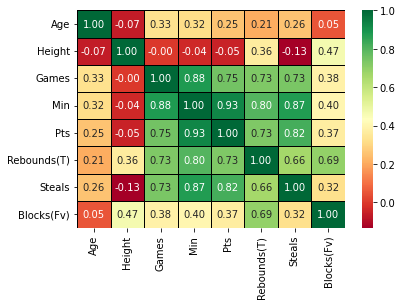

In [70]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", fmt='.2f', linewidth=1, linecolor='black');

### Scipy

In [71]:
r, p = stats.pearsonr(df.Height, df.Steals)
r

-0.13417989410775674

In [72]:
stats.pearsonr(df.Height, df.Steals)

(-0.13417989410775674, 0.02137348824376893)

In [73]:
stats.spearmanr(df.Height, df.Steals)

SpearmanrResult(correlation=-0.11650141655743865, pvalue=0.045947571943971914)

In [74]:
stats.kendalltau(df.Height, df.Steals)

KendalltauResult(correlation=-0.08247675483307715, pvalue=0.04153344991911273)